### TODO
+ Construct Overlay Function
+ Formalize Postprocess functions


In [75]:
# Import using scikit-video
import skvideo
#skvideo.setFFmpegPath("/usr/local/bin")
import skvideo.io
import skvideo.datasets
import matplotlib.pyplot as plt
import numpy as np

# Recommended ways of Trackpy
import pims
import trackpy as tp

from IPython.display import display
import ipywidgets as widgets

In [2]:
from ipywidgets import widgets, interactive
v = interactive(by_q, quarter=(['q1y2015', 'q2y2015', 'q3y2015', 'q4y2015']), days=(1, 180))
display(v)


NameError: name 'by_q' is not defined

In [3]:
def video_to_ndarray(path):
    """
    Parse a video file to an ndarray. Only works for complete formats, which include video metadata.
    """
    videodata = skvideo.io.vread(path)
    print("Shape: ", videodata.shape)
    return videodata


vid_path = "/Users/byatharth/code/SwimmingAlgaeVideos/Videos-Batch1/test_many_12mp.mjpeg"
stack = video_to_ndarray(vid_path)

Shape:  (71, 3040, 4056, 3)


In [39]:
import PIL
image = widgets.Image(
    value=stack[slider.value].tobytes(),
    format='rgb',
    width=400,
    height=400,
    
)

play = widgets.Play(
    value=0,
    min=0,
    max=stack.shape[0]-1,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)

slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
#widgets.jslink((play, 'value'), image)
widgets.HBox([play, slider])

widgets.interact(lambda : PIL.Image.fromarray(stack[slider.value]).resize([400, 400]), x=slider)


#vidpreview = Video.from_file(vid_path)
#vidpreview

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.<lambda>()>

In [5]:
# $$$ Expensive  
# Trying the matplotlib animation method
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(stack.shape[0]):
    im = ax.imshow(stack[i], animated=False)
    if i == 0:
        ax.imshow(stack[0])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
plt.show()

/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


KeyboardInterrupt: 

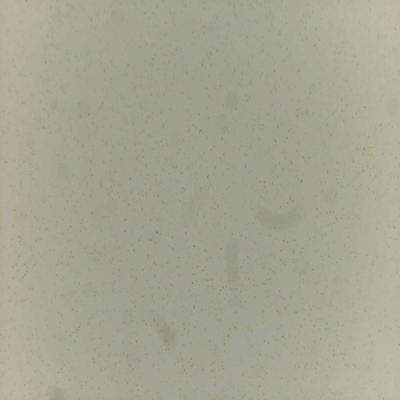

In [24]:
import PIL
PIL.Image.fromarray(stack[slider.value]).resize([400, 400])

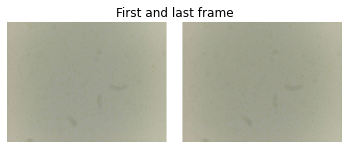

In [3]:
%matplotlib inline
def frames_preview(stack):
    """
    Shows the first and last frame of the image stack. Useful for inspection.
    """
    hstack = np.hstack([stack[0], np.full((stack[0].shape[0], \
                        round(stack[0].shape[1]*0.1), stack[0].shape[2]), 255, dtype=stack[0].dtype),
                        stack[-1]])
    plt.title("First and last frame")
    plt.axis('off')
    plt.imshow(hstack)
frames_preview(stack)

In [4]:
def fixed_crop(stack):
    """
    Crops the entire stack to a circular field of view by object etection. #TODO 
    Assumes that the first dimension is the number of frames.
    """
    # Crop image
    pass
    import numpy as np
    videodata_ = np.ndarray([videodata.shape[0], 1500-250, videodata.shape[2], videodata.shape[3]])
    videodata_.shape

In [5]:
def get_color_ch(stack, ch_id):
    """
    Returns a particlar color channel.
    """
    
    if isinstance(ch_id, str):
        map_ = {'r': 0, 'g': 1, 'b': 2}
        ch_id = map_[ch_id]
    channel = stack[:, :, :, ch_id]
    return channel

def grayscale_float(stack, cast=np.uint8):
    """
    Returns a float64 image, which is not very useful.
    """
    from skimage.color import rgb2gray
    return np.astype(np.round(rgb2gray(stack)))


#gray = grayscale(stack)


(71, 3040, 4056)
uint8


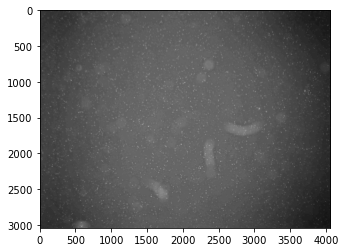

In [6]:
blue = get_color_ch(stack, 'g') #!!! ATENTION - BLUE IS NOW GREEN!
print(blue.shape)
print(blue[0].dtype)
plt.imshow(blue[0],cmap='gray')
plt.imshow(np.invert(blue[0]),cmap='gray')
blue_channel = blue

(3040, 4056)


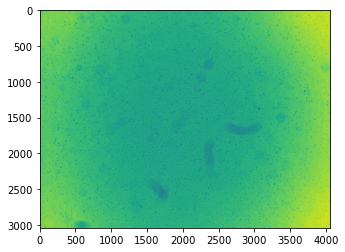

In [7]:
print(blue_channel[50].shape)
plt.imshow(blue_channel[50])

821


[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

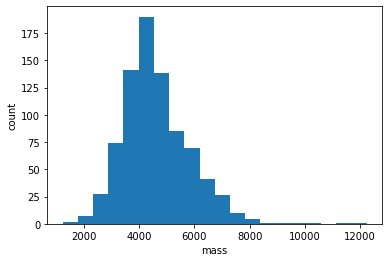

In [8]:
diameter = 71
min_mass = 500
f = tp.locate(blue[0], diameter, invert=True,  minmass=min_mass)
print(len(f))
f.head()

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

#fig.show()

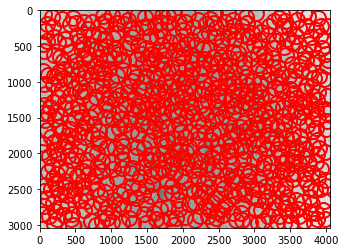

<AxesSubplot:>

In [9]:
tp.annotate(f, blue[0])

In [10]:
f_ = tp.batch(blue_channel[:], diameter, minmass=min_mass, invert=True)


Frame 70: 850 features


/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/byatharth/opt/miniconda3/envs/swim/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for t

In [11]:
# Smaller average speed parameter used.
t = tp.link(f_, 75, memory=5) #Create trajectories
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())


Frame 70: 850 trajectories present.
Before: 2996
After: 322


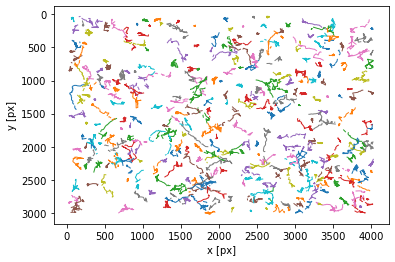

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [12]:
%matplotlib inline
plt.figure()
tp.plot_traj(t1)

In [19]:
t1.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,1976.611514,2500.090940,9611.244425,22.955973,0.411090,29.255225,370105.0,0.0,0,4
0,1995.834120,1729.866834,5470.546529,22.572314,0.680877,25.101706,367776.0,0.0,0,7
0,2003.472970,3880.112152,3180.151335,18.095064,0.288208,13.182910,294142.0,-0.0,0,8
0,2003.531124,1576.104543,5584.678025,14.031726,0.579585,27.088172,367805.0,0.0,0,10
0,1994.606395,3068.921787,5901.609632,19.120851,0.604419,29.796989,356390.0,0.0,0,11


In [24]:
t1[t1.frame == 1]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
1,1972.530383,954.413786,6852.664432,18.100105,0.315168,19.874875,361138.0,NaN,1,847
1,2003.568270,1730.181884,6016.156604,22.568000,0.788289,24.042187,367163.0,NaN,1,7
1,2005.594724,1578.277616,5341.051992,11.769387,0.632514,24.202468,366807.0,NaN,1,10
1,2001.200904,255.156507,5884.565701,17.910888,0.501407,27.087531,322929.0,NaN,1,12
1,2031.938892,127.966584,4312.046387,14.214542,0.198943,22.920218,318216.0,NaN,1,15
...,...,...,...,...,...,...,...,...,...,...
1,1011.393431,2009.044875,8686.442178,15.414323,0.421668,25.965562,371591.0,NaN,1,808
1,1009.903990,3079.397232,4956.537281,15.953679,0.657730,21.798250,349512.0,NaN,1,809
1,1018.459659,548.295268,7408.038953,19.079167,0.287490,14.906156,338575.0,NaN,1,820


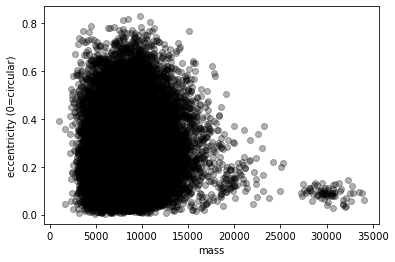

<AxesSubplot:xlabel='mass', ylabel='eccentricity (0=circular)'>

In [106]:
tp.mass_ecc(t1)

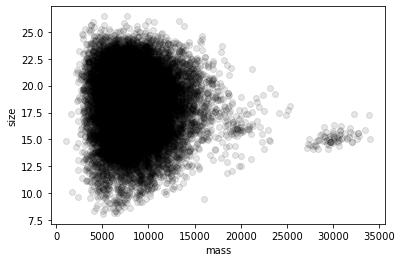

<AxesSubplot:xlabel='mass', ylabel='size'>

In [107]:
tp.mass_size(t1)

181010


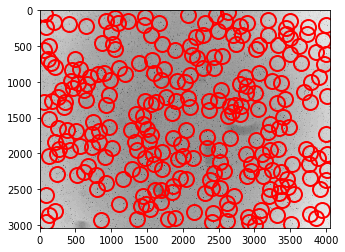

<AxesSubplot:>

In [25]:
%matplotlib inline
# Additional filtering
t2 = t1[((t1['mass'] < 20000) & (t1['size'] < 25) &
         (t1['ecc'] < 0.7))]
print(t2.size)
plt.figure()
tp.annotate(t2[t2['frame'] == 20], blue_channel[20])

<IPython.core.display.Javascript object>


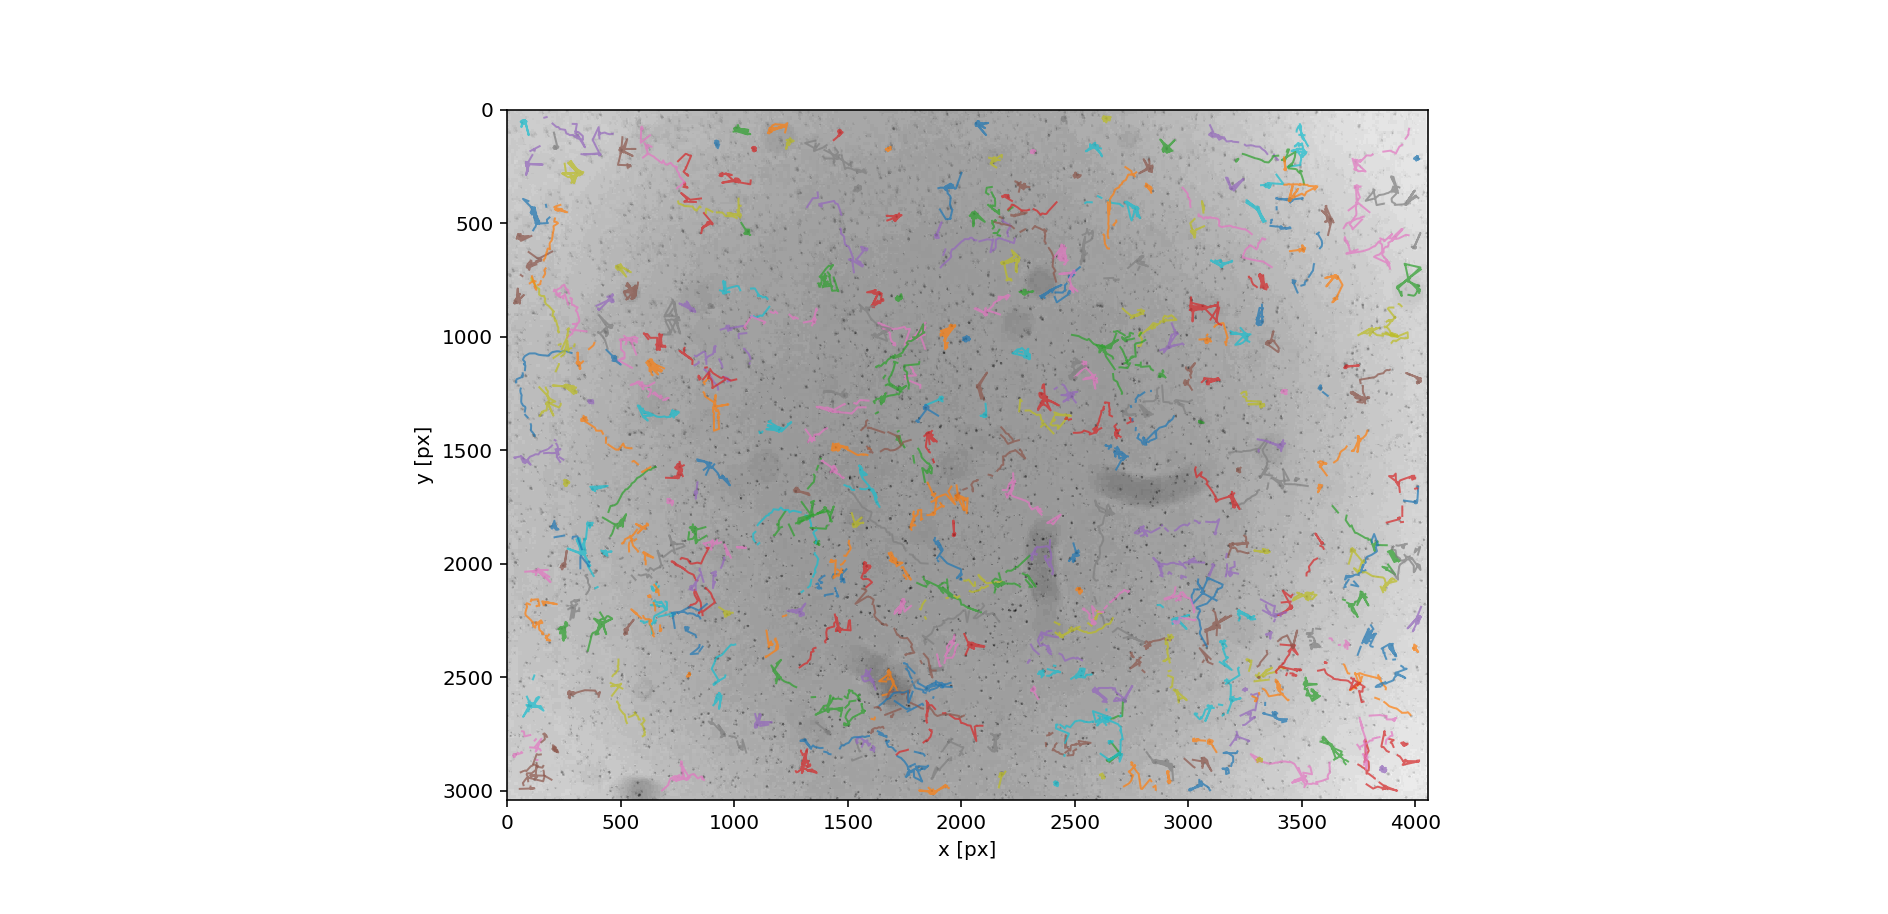

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [26]:
%matplotlib notebook
plt.figure()
tp.plot_traj(t2, \
             superimpose=blue[0]+(1/blue[-1]),\
             plot_style={"alpha":0.7})
# The last frame should be white dots and the first is daark dots (the first one has been inverted)

In [62]:
t2[t2.particle==4]
y = t2.y[t2.particle==4]
min(y.index)

0

In [67]:
def avg_speed(df, framerate=None):
    
    # We calculate the time
    tot_frames = max(df.index) - min(df.index)
    time = tot_frames
    
    
    xlist = np.array(df.x)
    ylist = np.array(df.y)
    
    # Calculating displacement and distance arrays
    dispx = xlist[:-1] - xlist[1:] # x(sans last element) - x(sans first element)
    dispy = ylist[:-1] - ylist[1:] # y(sans last element) - y(sans first element)
    
    # Displacement -> Distance array
    distx = abs(dispx)
    disty = abs(dispy)
    
    tot_distx = sum(distx)
    tot_disty = sum(disty)
    
    # Calculating the speed
    speed_x = tot_distx / time
    speed_y = tot_disty / time
    
    return (speed_x, speed_y)
    
avg_speed(t2[t2.particle==4], 0)   

(4.196319710183127, 6.584089172122727)

In [72]:
speeds = list()
for i in range(max(t2.particle)):
    df_per_particle = t2[t2.particle==i]
    
    if df_per_particle.empty:
        #print(i, "Particle doesn't exist!")
        pass # Ignore this particle number
        
    else:
        # Calculate speeds and append to list
        speeds.append(avg_speed(df_per_particle))
speeds

[(4.196319710183127, 6.584089172122727),
 (6.585274777333783, 8.477867972747617),
 (10.816540269811405, 11.808467195348035),
 (5.724910092552812, 5.653268070729),
 (11.056086212839586, 7.743680879954647),
 (4.208065591912569, 5.416324817582891),
 (8.517293251031491, 4.946378943665205),
 (6.318765016145707, 7.387670065552295),
 (3.2152018733185286, 4.834644877625627),
 (10.723991318359696, 22.918651420150454),
 (7.187958446463085, 7.036379332710801),
 (9.287558845979254, 9.363415439207806),
 (9.03613500634701, 8.936603380832112),
 (8.134447259191116, 9.134212427856513),
 (5.0990226792952615, 6.730150325754149),
 (7.282164656887679, 5.644394761566095),
 (7.447139168881618, 6.518528027959935),
 (7.97017443880809, 9.255568888843813),
 (3.8889817225138748, 3.0428294307753405),
 (3.3091328671885907, 2.4441479453788815),
 (5.799323563765513, 5.507766778769272),
 (6.681693813611764, 5.633638924070367),
 (9.824894995294605, 6.7120482232475815),
 (9.310790025816166, 10.852932498431212),
 (7.1122

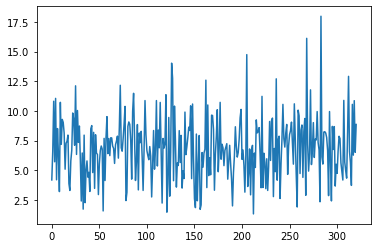

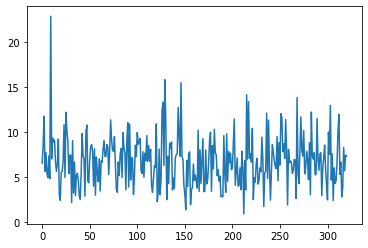

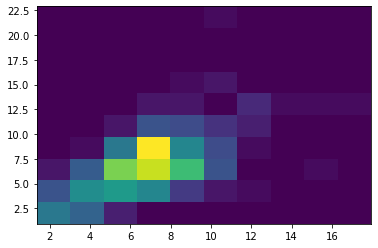

In [87]:
%matplotlib inline
def heatmap(avg_speeds):
    
    no_particles = len(speeds)
    
    # Seperate x and y speeds for all particles
    vx = [speeds[0] for speeds in avg_speeds]
    vy = [speeds[1] for speeds in avg_speeds]

    #Normalization
    #vx = [x/no_particles for x in vx]
    #vy = [y/no_particles for y in vy]
    
    plt.plot(vx)
    plt.show()
    plt.plot(vy)
    plt.show()
    plt.hist2d(vx, vy)
heatmap(speeds)

In [ ]:
# Lets calculate the MSD!
# We need per-frame data

def msd(df):
    
    # We calculate the time
    tot_frames = max(df.index) - min(df.index)
    time = tot_frames
    
    
    xlist = np.array(df.x)
    ylist = np.array(df.y)
    
    xi_minus_x0 = xlist[1:] - xlist[0]
    yi_minus_y0 = ylist[1:] - ylist[0]
    
    x_sq = np.square(xi_minus_x0)
    y_sq = np.square(yi_minus_y0)
    
    x_msd = np.sum(x_sq)
    #TODO
    